# SysML v2 JupyterBook

This Jupyter Notebook is an exploration of SysML v2 from the user perspective. It shows some SysML v2 basics, but mainly focuses on the special features compared to SysML v1 and how they can be used. For a detailed introduction to the textual syntax of SysML v2, I recommend the following PDF: [Introduction to the SysML v2 Language Textual Notation](https://github.com/Systems-Modeling/SysML-v2-Release/blob/master/doc/Intro%20to%20the%20SysML%20v2%20Language.pdf).

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

## Table of Contents
* [Modeling with SysML v2](#sysmlv2mod)
    * [Introduction](#sysmlv2modintroduction)
    * [Example and first steps](#sysmlv2modexample)
    * [Parts and PartDefinitions](#sysmlv2modparts)
    * [Putting the parts together](#sysmlv2modconnect)
    * [Modeling Interfaces](#sysmlv2modinterfaces)
    * [Modeling variants](#sysmlv2modvariants)
    * [Satisfying requirements](#sysmlv2modrequirements)
* [SysML v2 MBSE Methodologies JupyterBook](#sysmlv2modmethodologies)
    * [SYSMOD with SysML v2](#sysmlv2sysmod)
    * [FAS with SysML v2](#sysmlv2fas)

# Modeling with SysML v2<a name="sysmlv2mod"></a>

## Introduction<a name="sysmlv2modintroduction"></a>

This section provides 

* a brief introduction of the modeling with SysML v2,
* with a special focus on what is different compared to SysML v1.

It is not (yet) a complete SysML v2 tutorial. It uses the SysML v2 pilot implementation which is not intended as full modeling tool for industrail application. 

## Example and first steps<a name="sysmlv2modexample"></a>

The simple example system is the following electrical vehicle:

![Electrical HSUV](lego-evehicle.jpg)

Let's start with a logical architecture of the vehicle. A first major difference compared to SysML is that there is a textual syntax for SysML v2.
The following cell shows the textual SysML v2 syntax of the logical architecture. The package statement defines the namespace of our architecture. The architecture itself is a simple hierarchical set of parts.

In [10]:
package eVehicle_LogicalArchitecture {
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2];
        part rearWheel[2];
    }
}

Package eVehicle_LogicalArchitecture (591b961a-c162-4be9-99df-f8c82451be6a)


Run the cell above to create the real model (it is only a textual visualization). Then you can see the model by running the following code. It provides a deep insight into the model structures:

In [11]:
%show eVehicle_LogicalArchitecture

Package eVehicle_LogicalArchitecture (591b961a-c162-4be9-99df-f8c82451be6a)
  [Membership] PartUsage eVehicle (a3fd1d82-407a-4542-8ab2-8a1be2ef9019)
    [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage body (4094b2ed-860b-4bcc-a719-e52cc75abc5b)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage battery (d242560f-e9bb-4c8b-8dec-1f986aaac8e8)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage engine (2854968d-ba43-43a6-a084-5eec69b4cf7a)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage frontAxis (f43fe7ae-45cd-48e9-9865-48b3122161f5)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage rearAxis (6879ef31-fe69-43fa-b5ca-aced7a62bc14)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [

More convenient for the common model user, of course, is the graphical notation presented after the execution of the following cell:

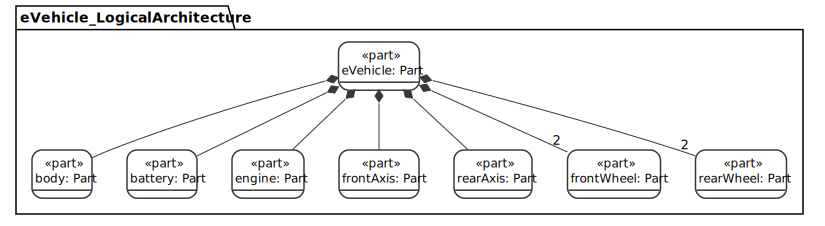

In [12]:
%viz --view=tree eVehicle_LogicalArchitecture

The diagram is only a view, and not an editor. A graphical editor is not provided in the pilot implementation. Future SysML v2 modeling tools will certainly offer graphical editors.

### Changes to SysML v1

SysML v2 is a complete new language with a different foundation than SysML v1. Therefore, there are plenty of differences. Here, we highlight only the changes that are most relevant to the modeler.

If I had modeled the eHSUV in SysML v1, I would have had to first define blocks and then part properties whose types are the blocks.

![eVehicle in SysML v1](evehicle-logical-architecture-sysmlv1.jpg)


## Parts and PartDefinitions<a name="sysmlv2modparts"></a>

In SysML v2, you can define parts without types. However, you could define types if you like. A type can be used to reuse definitions. I extend our example and add a property to the wheel to specify the size. The type of the attribute is Integer. I skip units for now.

In [13]:
package eVehicle_LogicalArchitecture {
    
    import ScalarValues::Integer;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2] {
            attribute size : Integer;
        }
        part rearWheel[2] {
            attribute size : Integer;
        }
    }
}

Package eVehicle_LogicalArchitecture (8749589e-603e-4b3d-bdff-2219f9f4f758)


Run the cell with the SysML v2 model, and visualize the model. If you also would like to see the model structure, execute the %show command.

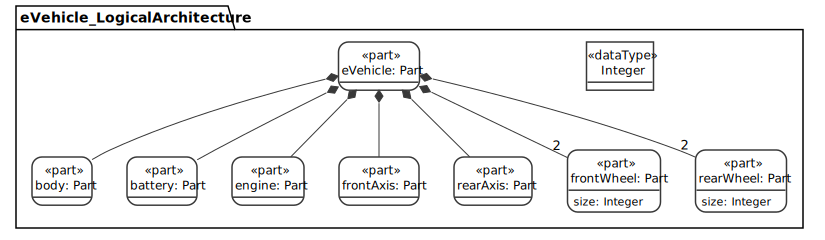

In [14]:
%viz --view=tree eVehicle_LogicalArchitecture

Although it is still very simple, the model already smells of reuse. The size attribute is currently defined twice. Now we define a type repsectively PartDefinition Wheels and specify that as the type of Parts.

In [15]:
package eVehicle_Definitions {

    import ScalarValues::Integer;   
    
    part def Wheel {
        attribute size : Integer;
    }
}

package eVehicle_LogicalArchitecture {

    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_Definitions (fb0059e2-6f8f-4072-80f6-cd9fea70d935)
Package eVehicle_LogicalArchitecture (35d47a1a-c6d6-41e5-8d7d-af0e3166e933)


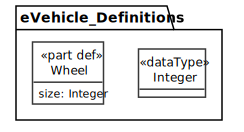

In [7]:
%viz --view=tree eVehicle_Definitions

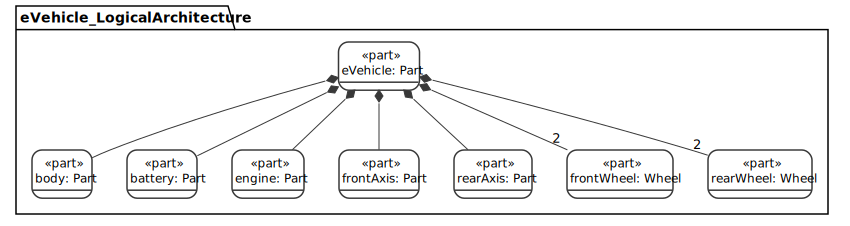

In [16]:
%viz --view=tree eVehicle_LogicalArchitecture

The attribute size itself can also be defined and reused for several attribute usages. It is a common concept in SysML v2 to separate  definition of elements and usage of elements. SysML v1 also follows this concept, but not as consequent as SysML v2. For example, SysML v1 does not provide a separate attribute definition.

The attribute definition is not mandatory and only partly useful in this example, because the size is only used at one place. But I added it anyhow as an example for attribute definitions. The keyword *attribute* can be omitted as for example in the definition of the *size* attribute. Alternatively, the keyword *value* can be used instead of *attribute*.

In [16]:
package eVehicle_Definitions {
   
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        attribute sizeOfWheel : WheelSize;
    }
}

package eVehicle_LogicalArchitecture {   
    
    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_Definitions (d70a8a62-b9ee-48e4-ad83-0ddfbf74cd92)
Package eVehicle_LogicalArchitecture (dd4b3fad-565a-4770-9998-0c0a66335376)


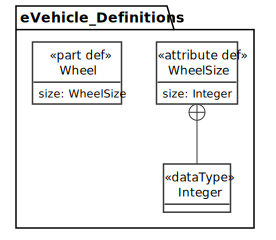

In [19]:
%viz --view=tree eVehicle_Definitions

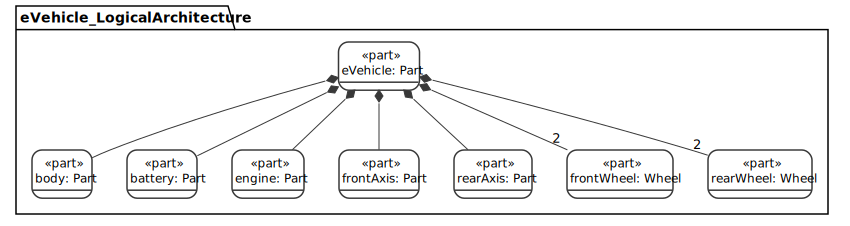

In [18]:
%viz --view=tree eVehicle_LogicalArchitecture

## Putting the parts together<a name="sysmlv2modconnect"></a>

By now the model only defines the breakdown structure of the vehicle. There is no definition yet of how the parts are connected. The next example model *eVehicle_LogicalArchitecture* connects the parts in a meaningful way.


In [19]:
package eVehicle_LogicalArchitecture {
       
    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery to engine;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (59c118fb-9398-406c-a2dc-d2eb77aee7fa)


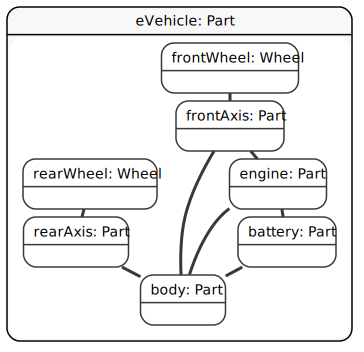

In [23]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

## Modeling interfaces<a name="sysmlv2modinterfaces"></a>

The interaction points are defined by ports in SysML v2, similar to SysML v1. The following extended example defines the interaction points between the engine and the battery. The connection is changed to connect the ports instead of the parts.

In [18]:
package eVehicle_LogicalArchitecture {
       
    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery {
            port powerOut;
        }
        part engine {
            port powerIn;
        }
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery::powerOut to engine::powerIn;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (49ce1ed5-4cd6-47f2-ba22-d3bbb80b23aa)


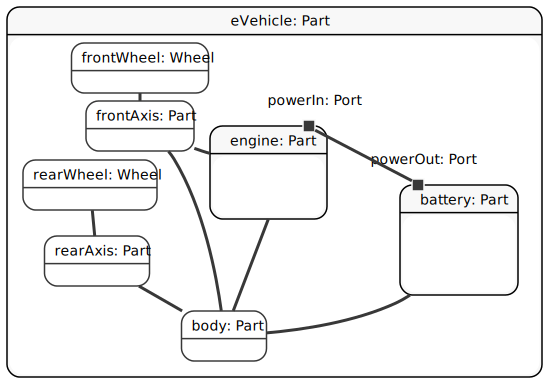

In [28]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

The ports *powerIn* and *powerOut* have no types respectively the SysML v2 library element *Port* as default type. The consistent usage/definition pattern applies here as well. The port is a usage. With a PortDef the interaction point can be defined. In this example it is a good candidate for a model library.

The port only specifies the interaction point. The interface defines the connection between interaction points. The *PowerOutPort* is conjugated for the *consumerPort* port.

In [25]:
package eVehicleLibrary {
    
    attribute def ElectricCurrent;
    
    port def PowerOutPort {
        out power : ElectricCurrent;
    }
    
    interface def PowerInterface {
        end supplierPort : PowerOutPort;
        end consumerPort : ~PowerOutPort;
    }
}

Package eVehicleLibrary (224a6ab4-e716-420d-a61b-38559e934f80)


Next, the definitions of the port and the interface are applied to the model. 

In [27]:
package eVehicle_LogicalArchitecture {
       
    import eVehicle_Definitions::*;
    import eVehicleLibrary::*;
    
    part eVehicle {    
        part body;
        part battery {
            port powerOut : PowerOutPort;
        }
        part engine {
            port powerIn : ~PowerOutPort;
        }
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        interface : PowerInterface connect 
            supplierPort => battery::powerOut to 
            consumerPort => engine::powerIn;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (d8c72875-1b6f-460f-bd4b-846cbc5b0636)


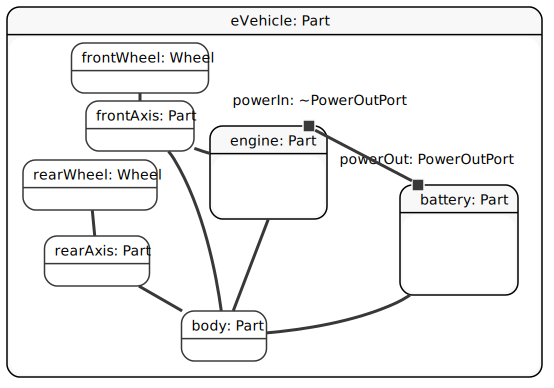

In [37]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

## Modeling variants<a name="sysmlv2modvariants"></a>

## Satisfying requirements<a name="sysmlv2modrequirements"></a>

# SysML v2 MBSE Methodologies JupyterBook<a name="sysmlv2modmethodologies"></a>

This chapter covers the impact of SysML v2 on MBSE methodologies.

Which methods continue to work well and which would need to be adapted? Theoretically, the methodologies have been developed independently of the SysML language, but definitely with a focus on SysML v1.

New features of SysML v2 can also lead to new methods in the methodologies.


## SYSMOD with SysML v2<a name="sysmlv2sysmod"></a>

The example is taken from the book [SYSMOD - The Systems Modeling Toolbox](https://leanpub.com/sysmod). It is a Forest Fire Detection System (FFDS).

### System Idea and System Objectives

The language extension of SysML v2 is still under development. Until it is available, I use a simplified approach to introduce SYSMOD concepts into the language. 

The following SysML v2 code defines the SYSMOD concepts of a *system* and an *objective*. They are applied to define the forest fire detection system element including the problem statement and the system idea, and the three system objectives.


In [29]:
package SYSMOD {

    doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta */
        
    requirement def Objective {
        doc /* A objective is an objective of the system. It is a special kind of a requirement that is typically not satisfied but amplified by the system. */
    }
    
    part def System {
        doc /* Marks the system under development. Typically there is only one block in the model with that stereotype. However in a System of Systems (SoS) model there could be more. */
        import ScalarValues::String;
        value problemStatement : String;
        value systemIdea : String;
    }
}

Package SYSMOD (d24fff79-0014-44a2-a8c4-a1e37328e788)


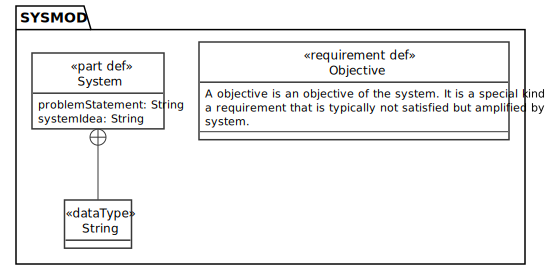

In [3]:
%viz SYSMOD

In [30]:
package ForestFireDetectionSystemModel {
    
    import SYSMOD::*;
    
    package FFDS_Core {
    
        part FFDS : System {
            
            value redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in detecting forest fires.";
            value redefines systemIdea = "The FFDS is a satellite-based system to detect forest fires in very large areas. The system is also equipped with stationary sensors and animal sensors. Using different sources for the fire detection increases the reliability of the system and enables different system configurations for different environmental contexts and price segments. Main features of the FFDS are Detecting and reporting forest fires on time Monitoring forest and fires Uses the behavior of forest animals to detect fires";
        }
        
        package FFDS_Requirements {
            package FFDS_Objectives {
                requirement id 'OBJ-B1' 'Market Leader' : Objective {
                    doc /* The system will make the vendor the market leader for forest fire detection systems. */
                }
                requirement id 'OBJ-S1' 'Reliable Detection' : Objective {
                    doc /* Any forest fire is detected by the system on time to start effective counteractions. */
                }
                requirement id 'OBJ-S2' 'Affordability' : Objective {
                    doc /* The system is affordable for any forest authority. */
                }                               
            }
        }
    }
}

Package ForestFireDetectionSystemModel (71643d3b-ee41-4f07-a87a-44cfb7cc8287)


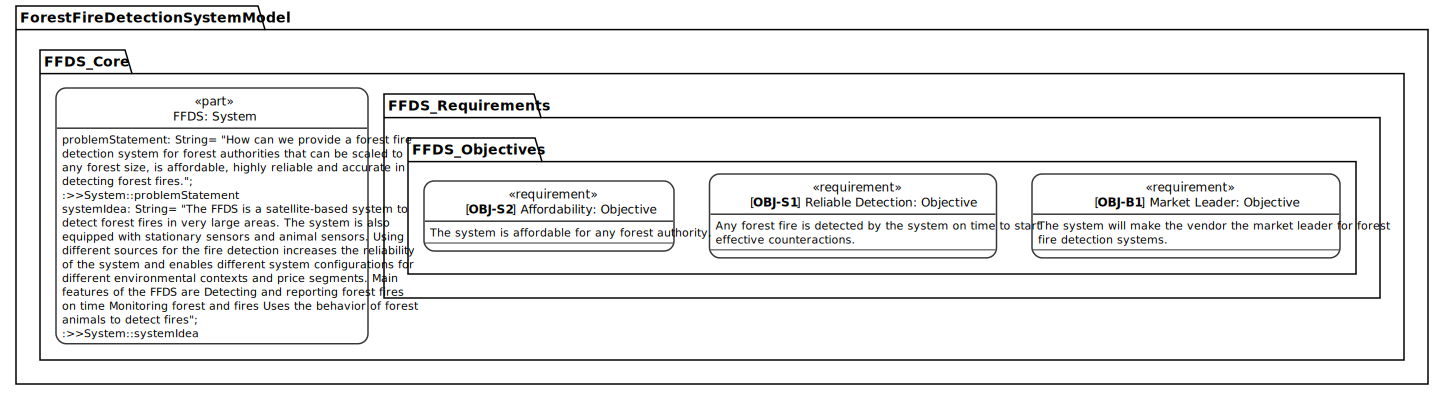

In [5]:
%viz ForestFireDetectionSystemModel

### System Context

The concepts of use cases and actors are not yet defined in SysML v2. Therefore, the external entities of the system are defined as parts of the context.

In [31]:
package SYSMOD {

    doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta */
        
    requirement def Objective {
        doc /* A objective is an objective of the system. It is a special kind of a requirement that is typically not satisfied but amplified by the system. */
    }
    
    part def System {
        doc /* Marks the system under development. Typically there is only one block in the model with that stereotype. However in a System of Systems (SoS) model there could be more. */
        import ScalarValues::String;
        value problemStatement : String;
        value systemIdea : String;
    }
    
    part def SystemContext {
        doc /* A system context is a wrapper around the system and it's actors to allow a detailed system context modeling. The system context references the appropriate system. This is important in a SoS model. */
            
        part systemOfInterest : System;
        part actors[0..*];        
    }
    
    part def User;
    part def ExternalSystem;
    part def EnvironmentalEffect;
    part def EnvironmentalImpact;
}

package ForestFireDetectionSystemModel {
    
    import SYSMOD::*;
    
    package FFDS_Core {
    
       part 'FFDS System Context' : SystemContext {
          part FFDS : System :> systemOfInterest {            
            value redefines problemStatement = "How can we provide a forest fire detection system for forest authorities that can be scaled to any forest size, is affordable, highly reliable and accurate in detecting forest fires.";
            value redefines systemIdea = "The FFDS is a satellite-based system to detect forest fires in very large areas. The system is also equipped with stationary sensors and animal sensors. Using different sources for the fire detection increases the reliability of the system and enables different system configurations for different environmental contexts and price segments. Main features of the FFDS are Detecting and reporting forest fires on time Monitoring forest and fires Uses the behavior of forest animals to detect fires";
          }
          part Operator : User subsets actors;
          part Administrator : User subsets actors;
          part 'Forest Ranger' : User subsets actors;
          part Maintenance : User subsets actors;
          part 'Fire Department' : ExternalSystem subsets actors;
          part 'Meteorology data system' : ExternalSystem subsets actors;
          part 'Research analysis system' : ExternalSystem subsets actors;
          part 'Weather' : EnvironmentalEffect subsets actors;
          part 'Fire' : EnvironmentalEffect subsets actors;
          part 'Planet Environment' : EnvironmentalImpact subsets actors;          
       }                
    
       package FFDS_Requirements {
          package FFDS_Objectives {
             requirement id 'OBJ-B1' 'Market Leader' : Objective {
                  doc /* The system will make the vendor the market leader for forest fire detection systems. */
             }
             requirement id 'OBJ-S1' 'Reliable Detection' : Objective {
                  doc /* Any forest fire is detected by the system on time to start effective counteractions. */
             }
             requirement id 'OBJ-S2' 'Affordability' : Objective {
                  doc /* The system is affordable for any forest authority. */
             }                               
         }
      }
   }
}

Package SYSMOD (f7d9cefb-d9ea-478e-be4d-19e9ba1d9193)
Package ForestFireDetectionSystemModel (20678909-1ca6-4c38-bb1f-456740dc8580)


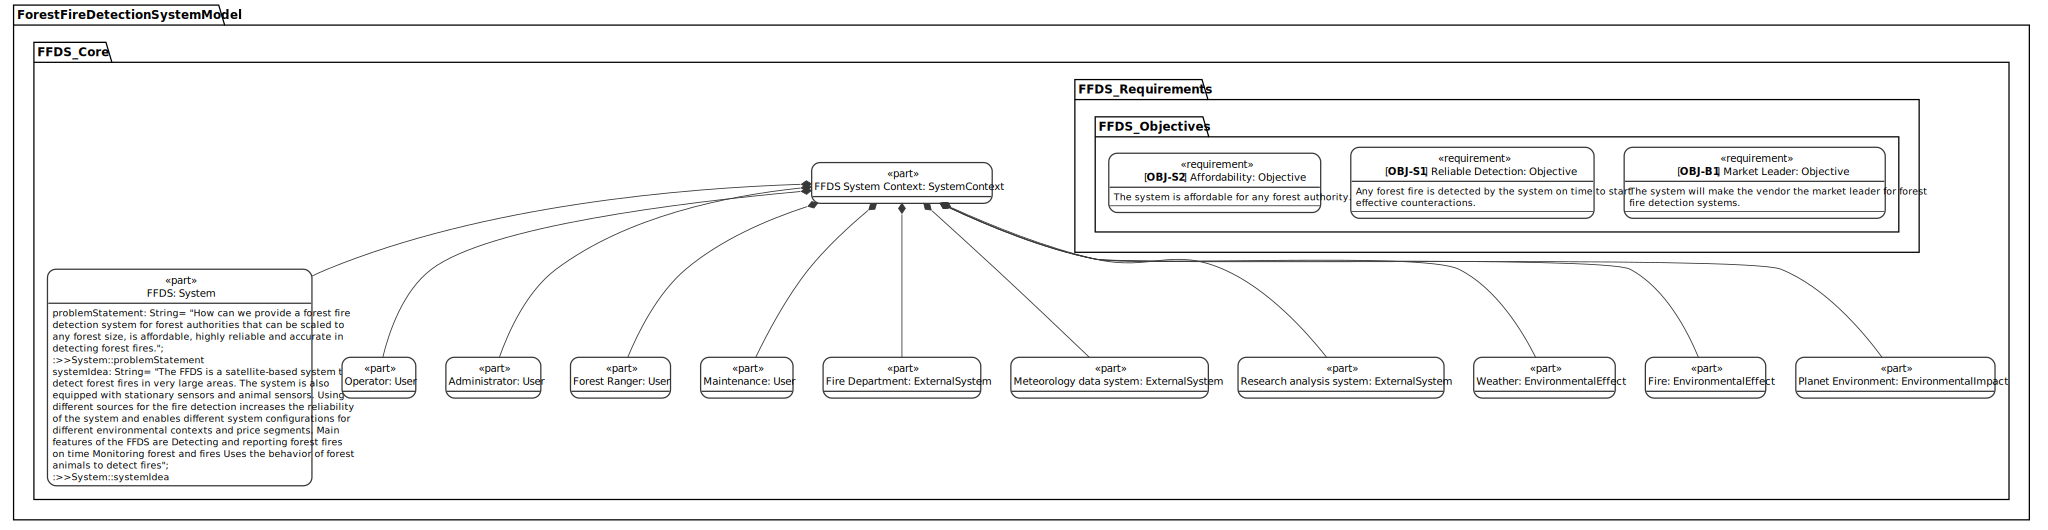

In [10]:
%viz ForestFireDetectionSystemModel

### System Use Cases

### Use Case Activities

### Domain Model

### Quality Requirements

### Logical Architecture 

### Product Architecture

### System States

### Verify Architecture with Scenarios

### Test Cases

## FAS with SysML v2<a name="sysmlv2fas"></a>

The example is taken from the tutorial of the FAS plugin for MagicDraw: http://sourceforge.net/projects/fas4md/files/FAS_plugin_tutorial.pdf/download.

In [47]:
package TheFASJukeBox {
    
    package UseCases {
        activity '(Un)install and Move Jukebox';
        activity 'Ask for Track to Play';
        activity 'Assemble Music Collection';
        activity 'Connect Jukebox with Electrical Supply';
        activity 'Disconnect from Electrical Supply';
        activity 'Distribute Energy';
        activity 'Get Energy';
        activity 'Get Mechanical Energy';
        activity 'Get Money';
        activity 'Insert Cash';
        activity 'Install Jukebox';
        activity 'Listen to Music';
        activity 'Make Music Available';
        activity 'Monitor Payment';
        activity 'Play Music Track';
        activity 'Produce Sound';
        activity 'Provide Music Track';
        activity 'Retrieve Identification of Music Track';
        activity 'Retrieve Money';
        activity 'Supply Jukebox with Energy';
        activity 'Transform Mechanical Engery into Something Harmless';
        activity 'Uninstall Jukebox';
        activity 'Use Means of Music Transfer to Retrieve Music';
    }
    
    package DomainKnowledge {
        item def AudioSignal;
        item def ClearanceToPlayMusic;
        item def ElectricalEnergy;
        item def IdentificationOfMusicTrack;
        item def MechanicalEnergy;
        item def Money;
        item def MusicTrack;
    }

    package FunctionalArchitecture {
        
        import UseCases::*;
        import DomainKnowledge::*;
        
        package FunctionalInterfaces {

            port def AudioSignalPort {
                out item a : AudioSignal;
            }
            port def ClearanceToPlayMusicPort {
                out item m : ClearanceToPlayMusic;
            }
            port def ElectricalEnergyPort {
                out item e : ElectricalEnergy;
            }
            port def IdentificationOfMusicTrackPort {
                out item m : IdentificationOfMusicTrack;
            }
            port def MechanicalEnergyPort {
                out item m : MechanicalEnergy;
            }
            port def MoneyPort {
                out item m : Money;
            }
            port def MusicTrackPort {
                out item m : MusicTrack;
            }
        }

        part TheFASJukeBoxFunctionalContext {
            
            import FunctionalInterfaces::*;
            
            part TheFASJukeBoxFunctionalArchitecture {

                dependency from TheFASJukeBoxFunctionalArchitecture to '(Un)install and Move Jukebox';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Assemble Music Collection';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Listen to Music';
                dependency from TheFASJukeBoxFunctionalArchitecture to 'Supply Jukebox with Energy';

                part 'I/O Customer' {
                    dependency from 'I/O Customer' to 'Ask for Track to Play';
                    dependency from 'I/O Customer' to 'Get Money';
                    dependency from 'I/O Customer' to 'Produce Sound';
                    
                    port p1 : MoneyPort;
                    port p2 : ~AudioSignalPort;
                    port p3 : IdentificationOfMusicTrackPort;
                }
                part 'I/O Electrical Supply' {
                    dependency from 'I/O Electrical Supply' to 'Get Energy';
                    
                    port p1 : ElectricalEnergyPort;
                }
                part 'I/O Music Supplier' {
                    dependency from 'I/O Music Supplier' to 'Use Means of Music Transfer to Retrieve Music';
                    
                    port p1 : MusicTrackPort;
                }
                part 'I/O Pub Interior' {
                    dependency from 'I/O Pub Interior' to 'Get Mechanical Energy';
                    
                    port p1 : MechanicalEnergyPort;
                }
                part 'I/O Pub Manager' {
                    dependency from 'I/O Pub Manager' to 'Connect Jukebox with Electrical Supply';
                    dependency from 'I/O Pub Manager' to 'Disconnect from Electrical Supply';
                    dependency from 'I/O Pub Manager' to 'Insert Cash';
                    dependency from 'I/O Pub Manager' to 'Retrieve Identification of Music Track';

                    port p1 : IdentificationOfMusicTrackPort;
                }
                part Accounting {
                    dependency from Accounting to 'Monitor Payment';
                    
                    port p1 : ClearanceToPlayMusicPort;
                    port p2 : ~MoneyPort;
                }
                part 'Energy Distribution' {
                    dependency from 'Energy Distribution' to 'Distribute Energy';
                    
                    port p1 : ~ElectricalEnergyPort;
                }
                part 'Music Player' {
                    dependency from 'Music Player' to 'Play Music Track';
                    
                    port p1 : AudioSignalPort;
                }
                part 'Music Storage' {
                    dependency from 'Music Storage' to 'Make Music Available';
                    dependency from 'Music Storage' to 'Provide Music Track';

                    port p1 : ~IdentificationOfMusicTrackPort;
                    port p2 : ~MusicTrackPort;
                    port p3 : ClearanceToPlayMusicPort;
                }
                part Suspension {
                    dependency from Suspension to 'Uninstall Jukebox';
                    
                    port p1 : ~MechanicalEnergyPort;
                }

                connect 'I/O Pub Manager'::p1 to 'Music Storage'::p1;
                connect 'I/O Pub Manager' to 'Accounting';
                connect 'I/O Music Supplier'::p1 to 'Music Storage'::p2;
                connect 'Accounting'::p1 to 'Music Storage'::p3;
                connect 'I/O Customer'::p1 to Accounting::p2;
                connect 'Music Player'::p1 to 'I/O Customer'::p2;
                connect 'I/O Customer'::p3 to 'Music Storage'::p1;
                connect 'I/O Electrical Supply'::p1 to 'Energy Distribution'::p1;
                connect 'I/O Pub Interior'::p1 to Suspension::p1;
            }

            part Customer;
            part 'Pub Manager';
            part 'Music Supplier';
            part 'Electrical Supply';
            part 'Pub Interior';
            
            connect 'Pub Manager' to TheFASJukeBoxFunctionalArchitecture::'I/O Pub Manager';
            connect 'Music Supplier' to TheFASJukeBoxFunctionalArchitecture::'I/O Music Supplier';
            connect Customer to TheFASJukeBoxFunctionalArchitecture::'I/O Customer';
            connect 'Electrical Supply' to TheFASJukeBoxFunctionalArchitecture::'I/O Electrical Supply';
            connect 'Pub Interior' to TheFASJukeBoxFunctionalArchitecture::'I/O Pub Interior';
        }
    }   
}

Package TheFASJukeBox (8d70f56e-28f6-4c9c-b0fd-875e376af418)


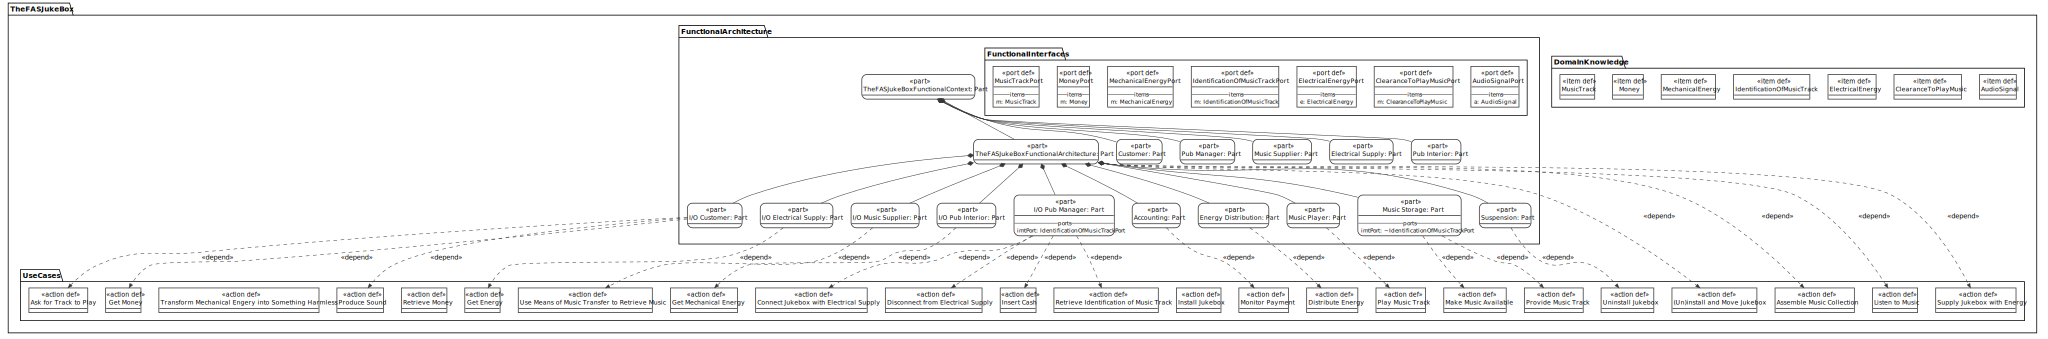

In [44]:
%viz --view=tree TheFASJukeBox

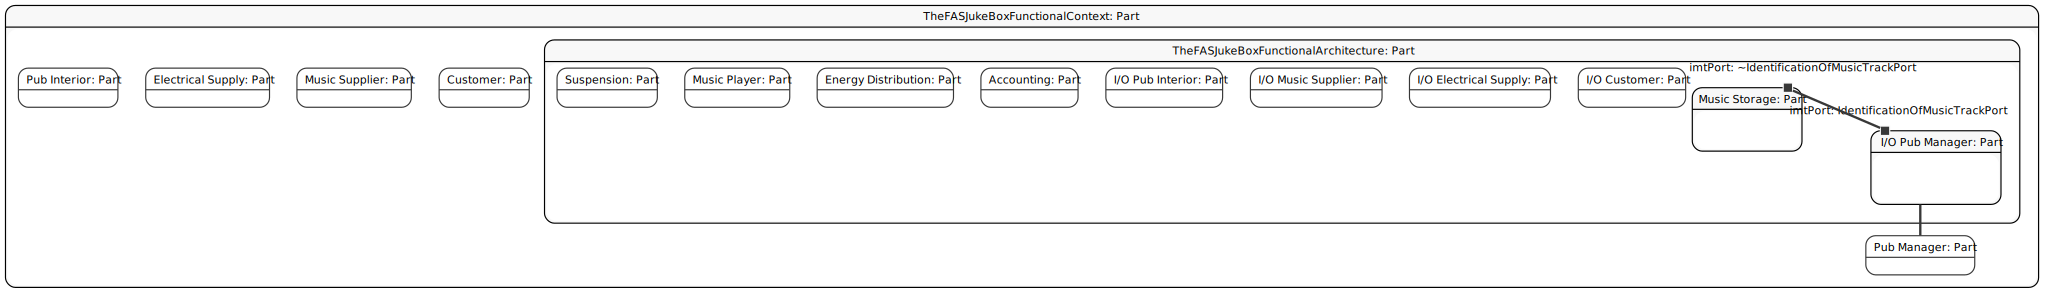

In [45]:
%viz --view=interconnection TheFASJukeBox::FunctionalArchitecture::TheFASJukeBoxFunctionalContext